In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [18]:
feature_file= os.path.abspath('features_org_stretch_pitch.csv')
feature_df = pd.read_csv(feature_file,index_col=False)

In [19]:
X = feature_df.iloc[: ,:-1].values
Y = feature_df['labels'].values
X,Y

(array([[3.00781250e-01, 7.06492245e-01, 7.56852806e-01, ...,
         5.37526876e-06, 2.27085820e-06, 1.64236539e-07],
        [1.77940538e-01, 6.66222930e-01, 7.39900291e-01, ...,
         2.70506325e-06, 1.08656866e-06, 9.83694051e-08],
        [1.84796369e-01, 6.50087893e-01, 7.05284417e-01, ...,
         2.49909181e-06, 8.49709522e-07, 4.75048587e-08],
        ...,
        [2.15621383e-01, 6.76596165e-01, 6.14103734e-01, ...,
         1.92967604e-03, 5.23758994e-04, 4.04801503e-05],
        [1.83311632e-01, 6.68179870e-01, 6.06806219e-01, ...,
         7.94242893e-04, 2.35575164e-04, 1.95215980e-05],
        [1.85998987e-01, 7.03913391e-01, 6.61699772e-01, ...,
         9.65747167e-04, 3.01387161e-04, 1.64965659e-05]]),
 array(['neutral', 'neutral', 'neutral', ..., 'surprised', 'surprised',
        'surprised'], dtype=object))

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import sys

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [21]:
X.shape,Y.shape

((4320, 162), (4320,))

In [22]:
OHE = OneHotEncoder()
Scaler = StandardScaler()
Y = OHE.fit_transform(Y.reshape(-1,1)).toarray()
X = Scaler.fit_transform(X)

In [23]:
x_train,x_test, y_train , y_test = train_test_split(X,Y,random_state=True,shuffle=True,train_size=.8)
x_train.shape, y_train.shape, x_test.shape , y_test.shape

((3456, 162), (3456, 8), (864, 162), (864, 8))

In [24]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3456, 162, 1), (3456, 8), (864, 162, 1), (864, 8))

In [15]:
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

---

# MAIN MODEL 1

---

In [212]:
x_train.dtype,x_test.dtype,y_test.dtype,y_train.dtype

(dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'))

In [213]:
model=Sequential()
model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=3, strides = 1, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 162, 256)          1024      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 162, 256)          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 81, 128)           163968    
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 41, 128)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 41, 128)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5248)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)              

In [214]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
epoch = 50
history=model.fit(x_train, y_train, batch_size=128, epochs=epoch, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
27/27 [==============================] - 4s 112ms/step - loss: 1.9156 - accuracy: 0.2352 - val_loss: 1.7918 - val_accuracy: 0.3345
Epoch 2/50
27/27 [==============================] - 3s 113ms/step - loss: 1.7733 - accuracy: 0.3368 - val_loss: 1.6612 - val_accuracy: 0.3738
Epoch 3/50
27/27 [==============================] - 3s 100ms/step - loss: 1.6738 - accuracy: 0.3669 - val_loss: 1.5799 - val_accuracy: 0.4086
Epoch 4/50
27/27 [==============================] - 2s 81ms/step - loss: 1.5952 - accuracy: 0.3953 - val_loss: 1.5029 - val_accuracy: 0.4456
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 1.5262 - accuracy: 0.4227 - val_loss: 1.4382 - val_accuracy: 0.4653
Epoch 6/50
27/27 [==============================] - 2s 77ms/step - loss: 1.4851 - accuracy: 0.4416 - val_loss: 1.3764 - val_accuracy: 0.4907
Epoch 7/50
27/27 [==============================] - 2s 78ms/step - loss: 1.4413 - accuracy: 0.4638 - val_loss: 1.3246 - val_accuracy: 0.5069
Epoch 8/50

In [215]:
x_test.shape , y_test.shape

((864, 162, 1), (864, 8))

27/27 [==============================] - 0s 7ms/step - loss: 0.6552 - accuracy: 0.7488
Accuracy of our model on test data :  74.88425970077515 %


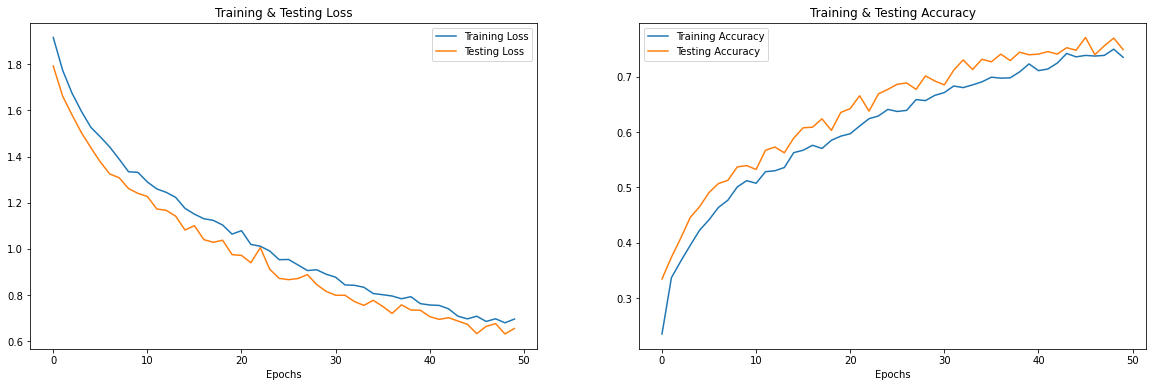

In [216]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(epoch)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [218]:
model.save(os.path.join("Models","Model_osp.h5"))

In [219]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = OHE.inverse_transform(pred_test)

y_test = OHE.inverse_transform(y_test)

In [220]:
df = pd.DataFrame(columns=['Actual Labels','Predicted Labels'])
df['Actual Labels'] = y_test.flatten()
df['Predicted Labels'] = y_pred.flatten()


df.tail(10)

,Actual Labels,Predicted Labels
854,angry,angry
855,surprised,surprised
856,disgust,disgust
857,surprised,surprised
858,disgust,disgust
859,calm,calm
860,surprised,surprised
861,sad,sad
862,sad,sad
863,surprised,surprised


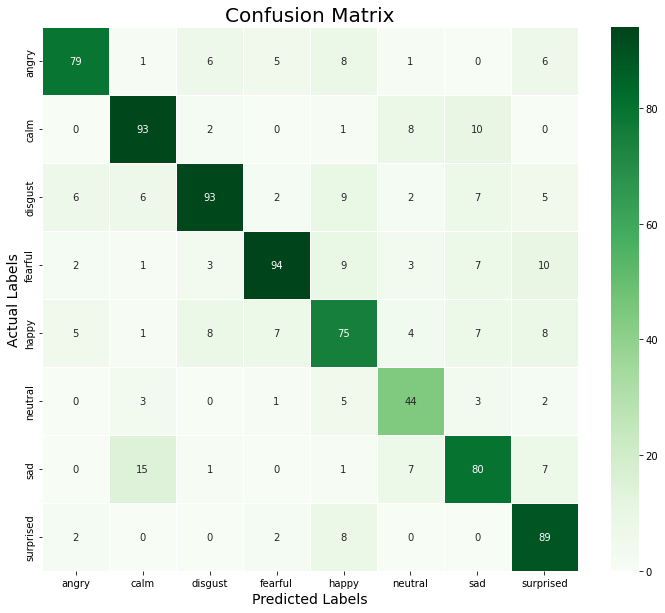

In [223]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in OHE.categories_] , columns = [i for i in OHE.categories_])
sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

---

# Model 2

---

In [241]:
model=Sequential()
model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 1, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.25))


# model.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=9, strides = 3, padding = 'same'))
# model.add(Dropout(0.35))


model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 162, 128)          512       
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 162, 128)          0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 81, 256)           164096    
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 41, 256)           0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 41, 256)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 10496)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [242]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
epoch = 35
history=model.fit(x_train, y_train, batch_size=64, epochs=epoch, validation_split=.2, callbacks=[rlrp])

Epoch 1/35
44/44 [==============================] - 3s 56ms/step - loss: 1.8737 - accuracy: 0.2652 - val_loss: 1.6875 - val_accuracy: 0.3931
Epoch 2/35
44/44 [==============================] - 4s 82ms/step - loss: 1.6993 - accuracy: 0.3560 - val_loss: 1.5424 - val_accuracy: 0.4249
Epoch 3/35
44/44 [==============================] - 2s 41ms/step - loss: 1.5841 - accuracy: 0.3944 - val_loss: 1.4621 - val_accuracy: 0.4408
Epoch 4/35
44/44 [==============================] - 2s 40ms/step - loss: 1.4912 - accuracy: 0.4305 - val_loss: 1.3787 - val_accuracy: 0.4754
Epoch 5/35
44/44 [==============================] - 2s 52ms/step - loss: 1.4341 - accuracy: 0.4562 - val_loss: 1.3287 - val_accuracy: 0.4986
Epoch 6/35
44/44 [==============================] - 2s 38ms/step - loss: 1.3861 - accuracy: 0.4877 - val_loss: 1.3201 - val_accuracy: 0.5231
Epoch 7/35
44/44 [==============================] - 2s 37ms/step - loss: 1.3293 - accuracy: 0.5127 - val_loss: 1.2616 - val_accuracy: 0.5318
Epoch 8/35
44

27/27 [==============================] - 1s 9ms/step - loss: 0.7034 - accuracy: 0.7720
Accuracy of our model on test data :  77.1990716457367 %


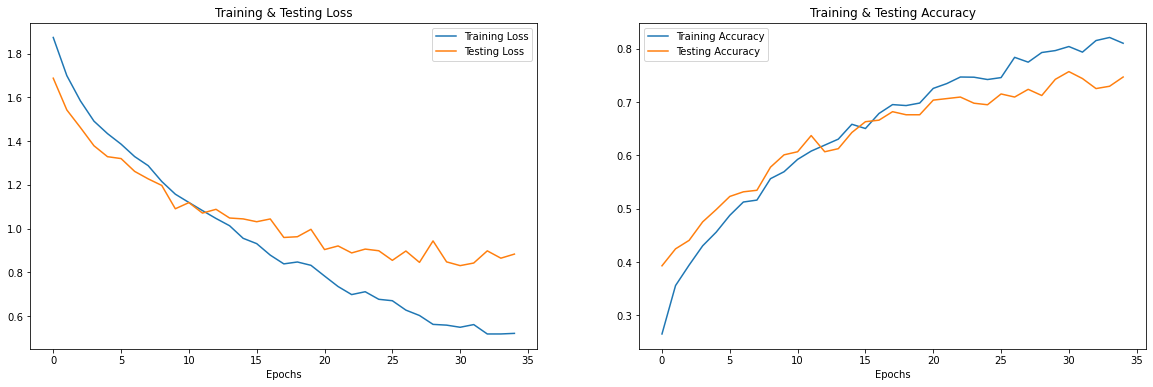

In [243]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(epoch)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

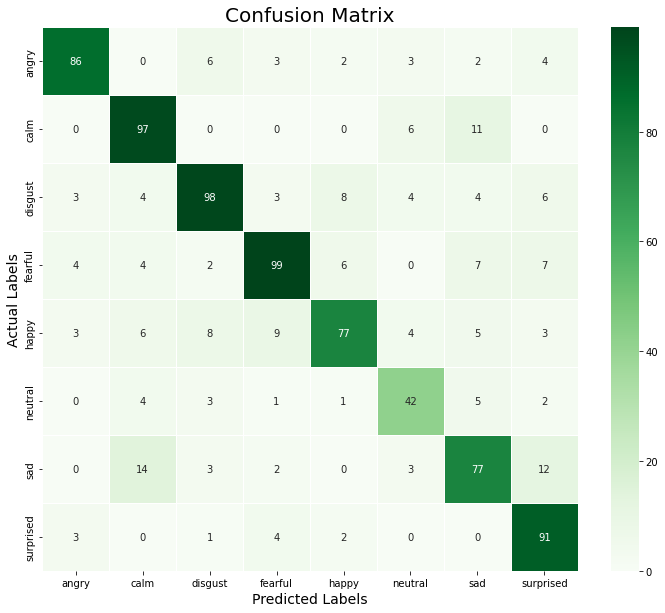

In [244]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = OHE.inverse_transform(pred_test)

y_test = OHE.inverse_transform(y_test)

df = pd.DataFrame(columns=['Actual Labels','Predicted Labels'])
df['Actual Labels'] = y_test.flatten()
df['Predicted Labels'] = y_pred.flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in OHE.categories_] , columns = [i for i in OHE.categories_])
sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [245]:
model.save(os.path.join("Models","Model_osp_2_77.h5"))

---

# Model 3

---

In [10]:
model_3=Sequential()
model_3.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_3.add(MaxPooling1D(pool_size=3, strides = 3, padding = 'same'))

model_3.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu'))
model_3.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dense(units=64, activation='relu'))
model_3.add(Dropout(0.2))


model_3.add(Dense(units=8, activation='softmax'))
model_3.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 54, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 128)           163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [11]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
epoch = 35
history=model_3.fit(x_train, y_train, batch_size=64, epochs=epoch, validation_split=.2, callbacks=[rlrp])

Epoch 1/35
44/44 [==============================] - 2s 24ms/step - loss: 1.9074 - accuracy: 0.2344 - val_loss: 1.7610 - val_accuracy: 0.3627
Epoch 2/35
44/44 [==============================] - 2s 39ms/step - loss: 1.7342 - accuracy: 0.3318 - val_loss: 1.6076 - val_accuracy: 0.4090
Epoch 3/35
44/44 [==============================] - 1s 34ms/step - loss: 1.5935 - accuracy: 0.4009 - val_loss: 1.4760 - val_accuracy: 0.4711
Epoch 4/35
44/44 [==============================] - 2s 34ms/step - loss: 1.4797 - accuracy: 0.4432 - val_loss: 1.4246 - val_accuracy: 0.4740
Epoch 5/35
44/44 [==============================] - 1s 24ms/step - loss: 1.3939 - accuracy: 0.4797 - val_loss: 1.2977 - val_accuracy: 0.5130
Epoch 6/35
44/44 [==============================] - 2s 48ms/step - loss: 1.2881 - accuracy: 0.5268 - val_loss: 1.2546 - val_accuracy: 0.5361
Epoch 7/35
44/44 [==============================] - 1s 26ms/step - loss: 1.2364 - accuracy: 0.5478 - val_loss: 1.1852 - val_accuracy: 0.5621
Epoch 8/35
44

27/27 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.8310
Accuracy of our model on test data :  83.10185074806213 %


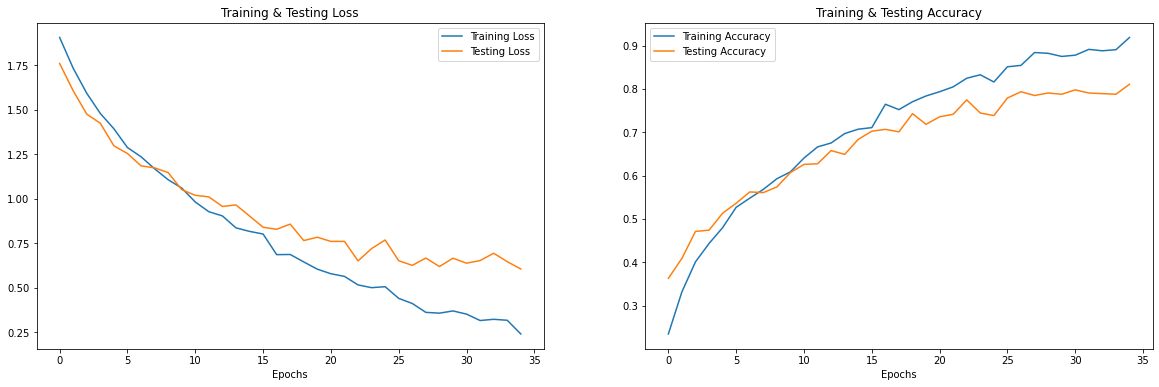

In [13]:
print("Accuracy of our model on test data : " , model_3.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(epoch)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

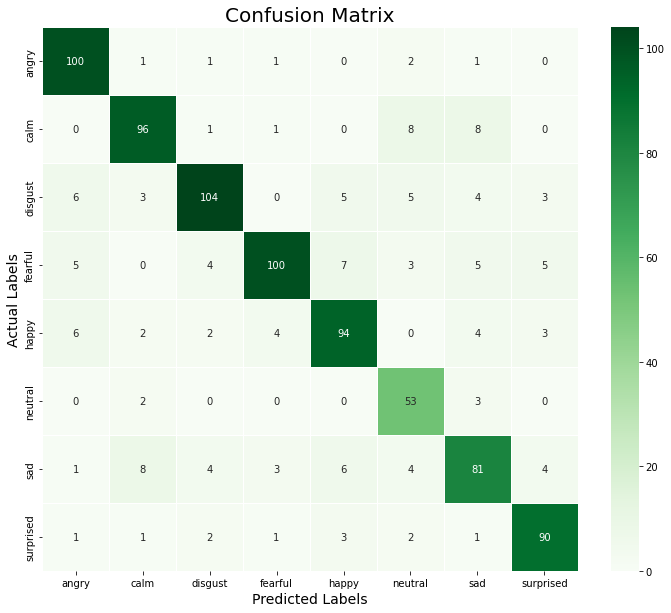

In [25]:
# predicting on test data.
pred_test = model_3.predict(x_test)
y_pred = OHE.inverse_transform(pred_test)

y_test = OHE.inverse_transform(y_test)

df = pd.DataFrame(columns=['Actual Labels','Predicted Labels'])
df['Actual Labels'] = y_test.flatten()
df['Predicted Labels'] = y_pred.flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in OHE.categories_] , columns = [i for i in OHE.categories_])
sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [26]:
model_3.save(os.path.join("Models","Model_osp_3_83.h5"))